# Hodgkin-Huxley model

In [1]:
from neuron import h
import matplotlib.pyplot as plt

In [2]:
# Compile the modfiles
!nrnivmodl modfiles > /dev/null 2>&1

In [13]:
# Define the model
class HHSpiker:
    
    def __init__(self):

        # Soma morphology
        self.soma = h.Section(name = "soma")
        self.soma.nseg = 1
        self.soma.cm = 1 # (mF / cm2)
        self.soma.L = 18.8
        self.soma.diam = 18.8

        # Soma channels (leak, Na, Kdr)
        self.soma.insert("hh")

        # CI
        self.I = h.IClamp(self.soma(0.5))

        # Recorders
        self.V = h.Vector().record(self.soma(0.5)._ref_v)

    def set_I(self, amp: float, dur: float, delay: float):
        self.I.amp = amp
        self.I.dur = dur
        self.I.delay = delay

In [15]:
# Set the simulation
h.load_file('stdrun.hoc')
h.celsius = 6.3 # (degC, Squid axon)
h.tstop = 1000 # (ms)
h.dt = 0.1 # (ms)
h.steps_per_ms = 1 / h.dt
h.v_init = -70 # (mV)

# Initialize the cell and set CI
cell = HHSpiker()
cell.set_I(amp = 0.1, dur = 500, delay = 250) # (nA, ms, ms)

In [16]:
# Run the simulation
h.run()

0.0

Text(0.5, 1.0, 'Hodgkin-Huxley model')

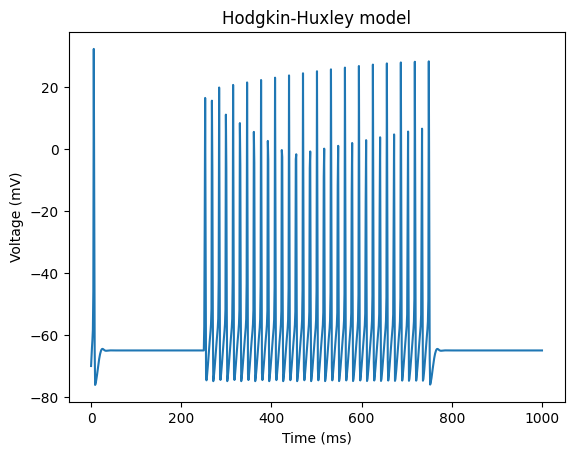

In [19]:
# Plot the results
voltage = cell.V.as_numpy()[::10] # sample at dt

fig, ax = plt.subplots(1, 1)
ax.plot(range(len(voltage)), voltage)
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Voltage (mV)")
ax.set_title("Hodgkin-Huxley model")